<a href="https://colab.research.google.com/github/helijus/ProvaAnaliseDados/blob/main/ProvaPratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #manipulação de dados em formato de dataframe
import numpy as np #biblioteca para operações matemáticas multidimensionais
import seaborn as sns #biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt #biblioteca de visualização de dados
from scipy import stats
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
drive.mount('/content/drive')

# Caminho do diretório escolhido
path = "/content/drive/MyDrive/Aulas Anisio"

Mounted at /content/drive


## 1 - Escolha da Base de Dados:

####**Base:** Conjunto de dados de previsão de AVC (Stroke Prediction Dataset)

####**Colunas da base (Inglês x Português):**

* **id (id):** identificador único
* **gender (sexo):** "Masculino", "Feminino" ou "Outro"
* **age (idade):** idade do paciente
* **hypertension (hipertensão):** 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
* **heart_disease (doença cardíaca):** 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença
cardíaca
* **ever_married (ja foi casado):** "Não" ou "Sim"
* **work_type (tipo de trabalho):** "crianças", "Govt_jov", "Never_worked", "Privado" ou "Autônomo"
* **Residence_type (tipo de residência):** "Rural" ou "Urbano"
* **avg_glucose_level:** nível médio de glicose no sangue
* **bmi (IMC):** índice de massa corporal
* **smoking_status (status de fumante):** "anteriormente fumado", "nunca fumou", "fuma" ou "Desconhecido"
* **stroke (acidente vascular cerebral):** se o paciente teve um acidente vascular cerebral ou 0 se não


**Nota:** "Desconhecido" em smoking_status significa que a informação não está disponível para este paciente


####**Fonte**: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [3]:
# Leitura do arquivo
df_avcdataset = pd.read_csv(path + '/healthcare-dataset-stroke-data.csv', sep=',')

df_avcdataset = df_avcdataset.dropna()

df_avcdataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


## 2 - Análise Descritiva:



###**2.1 Distribuição dos dados**



*   Gráfico de Barras
*   Gráfico de Pizza
*   Histograma
*   Boxplots






##**Gráfico de Barras:**

gender: Frequência de homens, mulheres e outras categorias, se houver.
hypertension: Frequência de pessoas com ou sem hipertensão (0 ou 1).
`heart_disease`: Frequência de pessoas com ou sem doença cardíaca (0 ou 1).
smoking_status: Frequência de categorias relacionadas ao tabagismo

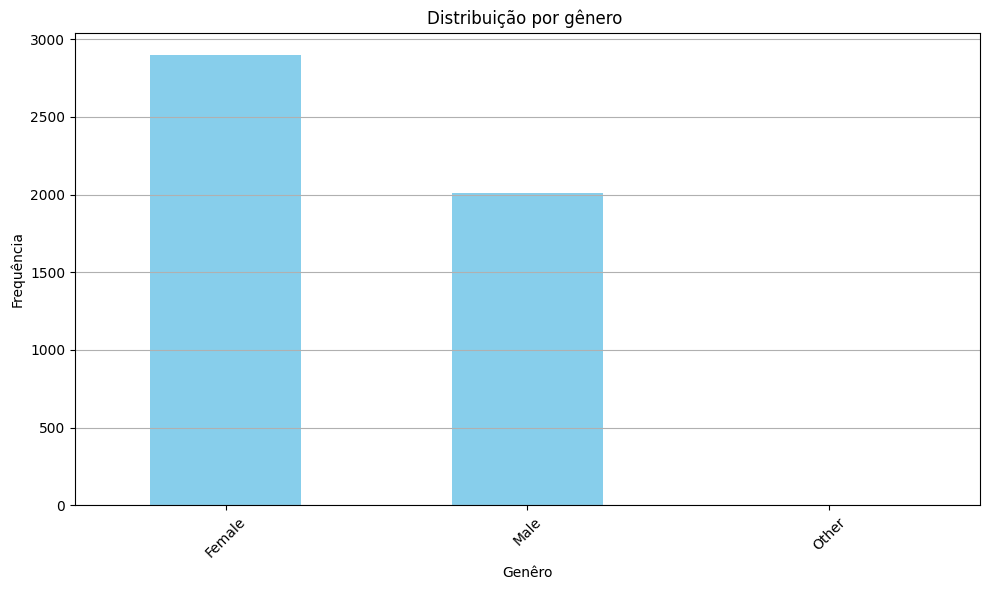

In [4]:
# Contar a frequência para cada genero
frequencia_genero = df_avcdataset['gender'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
frequencia_genero.plot(kind='bar', color='skyblue')
plt.title('Distribuição por gênero ')
plt.xlabel('Genêro')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

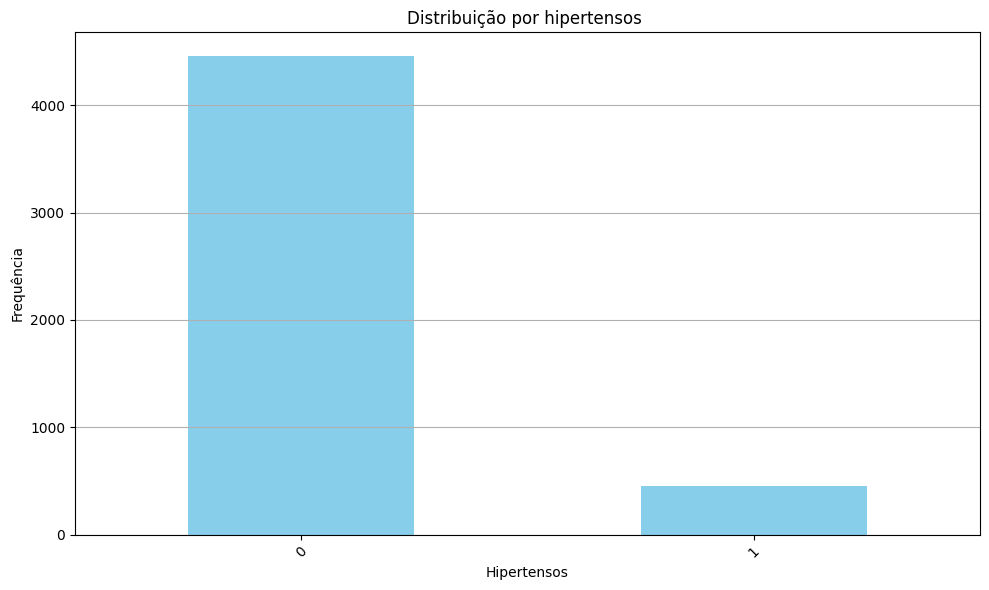

In [5]:
# Contar a frequência para pessoas hipertensas
frequencia_hipertensos = df_avcdataset['hypertension'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
frequencia_hipertensos.plot(kind='bar', color='skyblue')
plt.title('Distribuição por hipertensos ')
plt.xlabel('Hipertensos')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

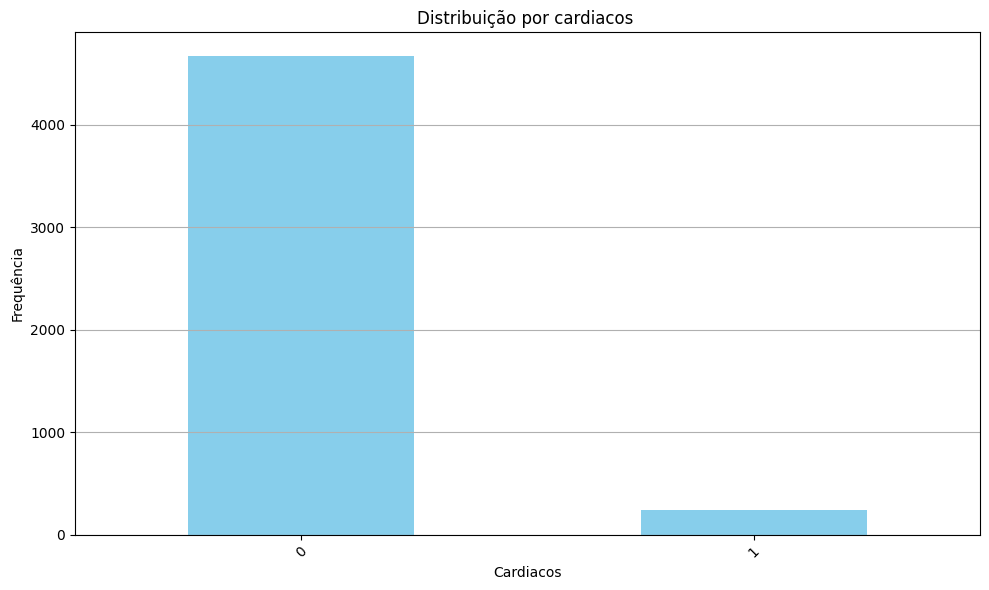

In [6]:
# Contar a frequência para pessoas cardíacas
frequencia_cardiacos = df_avcdataset['heart_disease'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
frequencia_cardiacos.plot(kind='bar', color='skyblue')
plt.title('Distribuição por cardiacos ')
plt.xlabel('Cardiacos')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

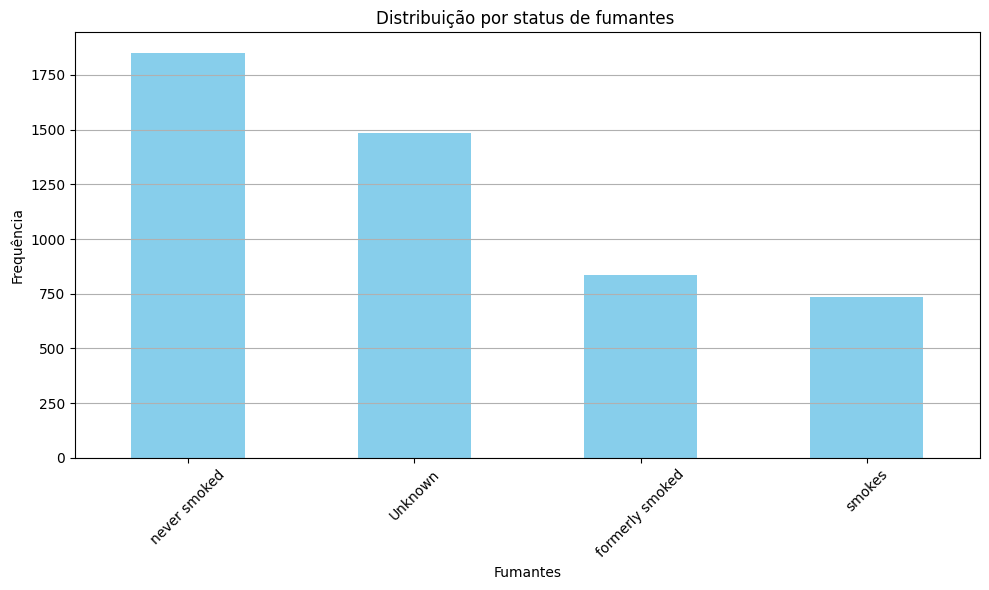

In [7]:
# Contar a frequência para pessoas fumantes
frequencia_fumantes = df_avcdataset['smoking_status'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
frequencia_fumantes.plot(kind='bar', color='skyblue')
plt.title('Distribuição por status de fumantes ')
plt.xlabel('Fumantes')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

##**Gráfico de Pizza:**

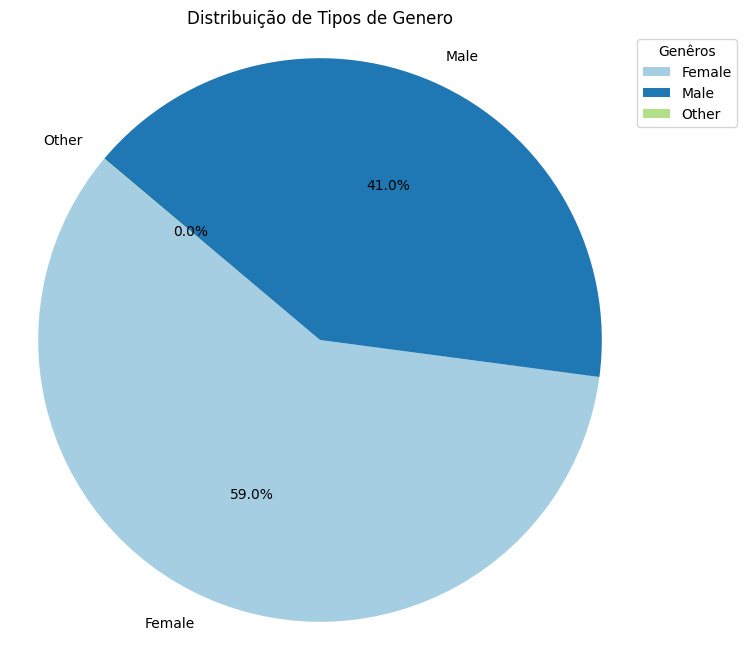

In [8]:
# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_genero, labels=frequencia_genero.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Tipos de Genero')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo

#Para usar a caixa Legenda
plt.legend(frequencia_genero.index, title = "Genêros", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Exibir o gráfico
plt.show()


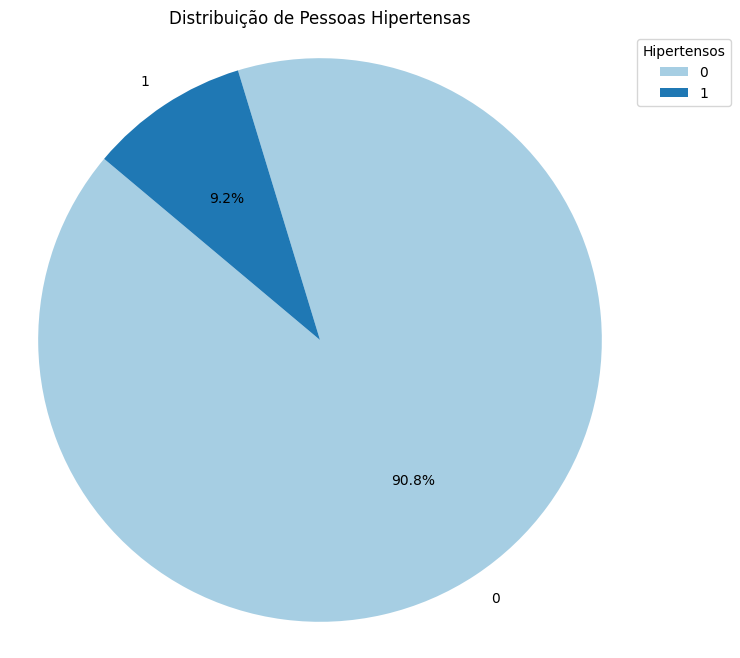

In [9]:
# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_hipertensos, labels=frequencia_hipertensos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Pessoas Hipertensas')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo

#Para usar a caixa Legenda
plt.legend(frequencia_hipertensos.index, title = "Hipertensos", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Exibir o gráfico
plt.show()

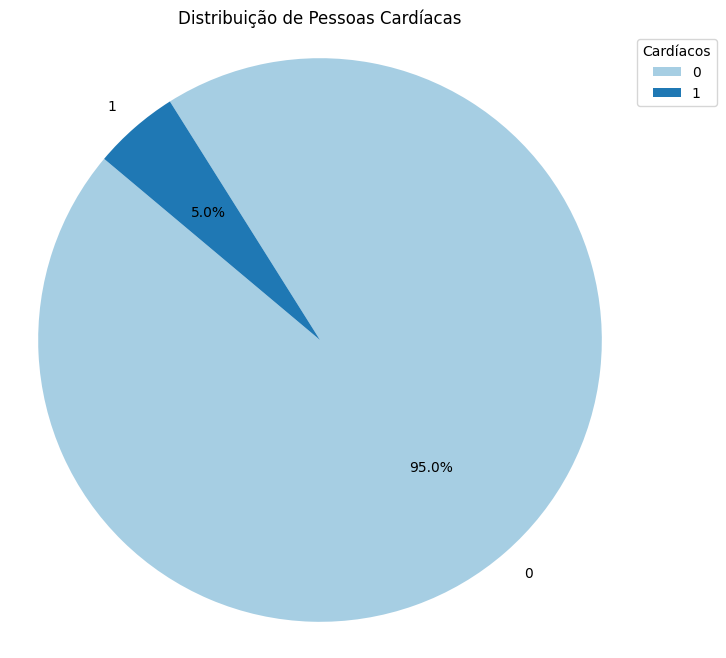

In [10]:
# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_cardiacos, labels=frequencia_cardiacos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Pessoas Cardíacas')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo

#Para usar a caixa Legenda
plt.legend(frequencia_cardiacos.index, title = "Cardíacos", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Exibir o gráfico
plt.show()

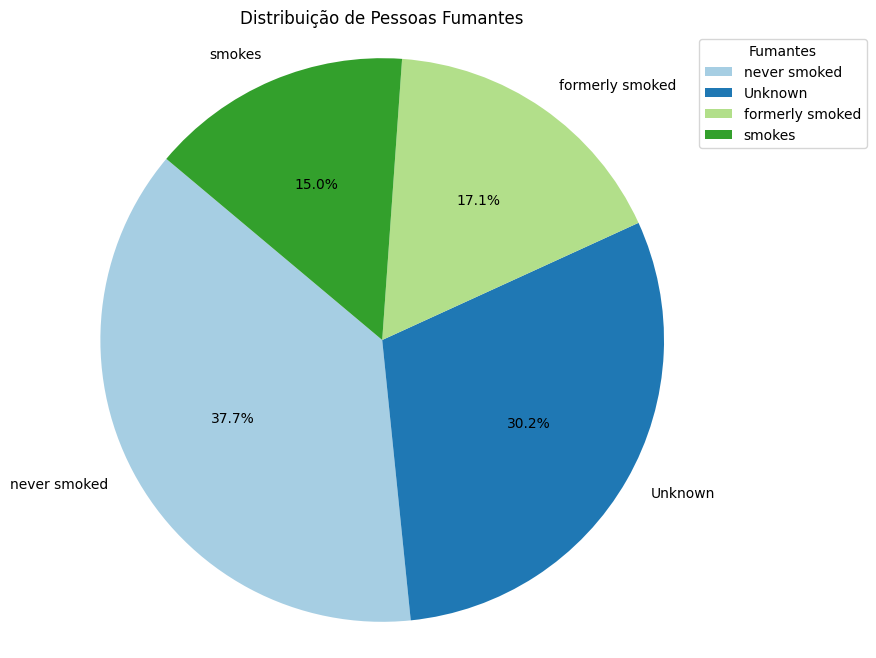

In [11]:
# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_fumantes, labels=frequencia_fumantes.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Pessoas Fumantes')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo

#Para usar a caixa Legenda
plt.legend(frequencia_fumantes.index, title = "Fumantes", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Exibir o gráfico
plt.show()

##**Histogramas:**

age: Faixa etária dos indivíduos.
avg_glucose_level: Distribuição dos níveis médios de glicose.
bmi: Distribuição do Índice de Massa Corporal.

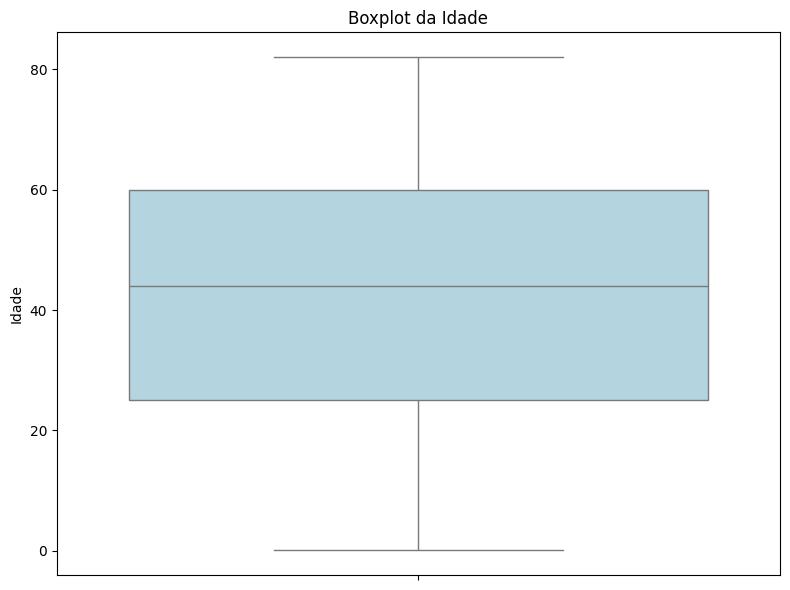

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=df_avcdataset, color='lightblue')
plt.title('Boxplot da Idade')
plt.ylabel('Idade')

# Exibir o gráfico
plt.tight_layout()
plt.show()


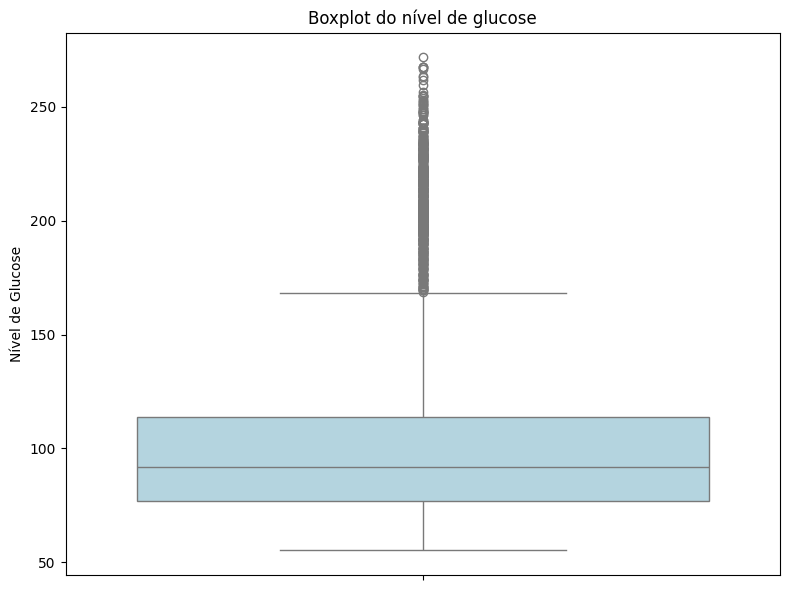

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='avg_glucose_level', data=df_avcdataset, color='lightblue')
plt.title('Boxplot do nível de glucose')
plt.ylabel('Nível de Glucose')

# Exibir o gráfico
plt.tight_layout()
plt.show()

###**2.2 Medidas de Tendência central**


*   Média
*   Moda
*   Mediana




####**Idade**

In [14]:
media_idade = df_avcdataset['age'].mean()
print(f"A média é: {media_idade}")

A média é: 42.865373803218574


In [15]:
moda_idade = stats.mode(df_avcdataset['age'])
print(f"A moda é: {moda_idade}")

A moda é: ModeResult(mode=57.0, count=93)


In [16]:
mediana_idade = df_avcdataset['age'].median()
print(f"A mediana é: {mediana_idade}")

A mediana é: 44.0


####**Nível de Glucose**

In [17]:
media_nivelg = df_avcdataset['avg_glucose_level'].mean()
print(f"A média é: {media_nivelg}")

A média é: 105.3051497249949


In [18]:
moda_nivelg = stats.mode(df_avcdataset['avg_glucose_level'])
print(f"A moda é: {moda_nivelg}")

A moda é: ModeResult(mode=93.88, count=6)


In [19]:
mediana_nivelg = df_avcdataset['avg_glucose_level'].median()
print(f"A mediana é: {mediana_nivelg}")

A mediana é: 91.68


###**2.3 Medidas de dispersão**

* Variância
* Desvio padrão
* Amplitude

####**Idade**

In [68]:
df_avcdataset['age'].describe()

,age
count,4909.000000
mean,42.865374
std,22.555115
min,0.080000
25%,25.000000
50%,44.000000
75%,60.000000
max,82.000000


####**Nível de Glucose**

In [69]:
df_avcdataset['avg_glucose_level'].describe()

,avg_glucose_level
count,4909.000000
mean,105.305150
std,44.424341
min,55.120000
25%,77.070000
50%,91.680000
75%,113.570000
max,271.740000


##3 - Proposição de Hipótese: O nível médio de glicose varia significativamente entre os diferentes status de fumantes.



*   Hipóstese nula  (H0H_0H0​) - O nível médio de glicose é igual entre os tipos de status de fumantes.

*   Hipótese alternativa (H1H_1H1​) - Um ou mais dos tipos de status de fumantes apresenta uma média de glicose diferente.




## 4- Teste de Hipóteses:

*   Escolha do teste: ANOVA
*   Motivo:
*   Realize o teste e interprete os resultados.
*   Inclua a análise do p-valor e o intervalo de confiança.


In [59]:
df_limpeza = df_avcdataset.dropna(subset=['avg_glucose_level', 'smoking_status'])

groups = df_limpeza.groupby('smoking_status')['avg_glucose_level'].apply(list)

stats.f_oneway(*groups)


F_onewayResult(statistic=21.120509972026177, pvalue=1.3682179392555517e-13)

## 5- Análise de Regressão:



*   Realize uma análise de regressão para identificar possíveis relações entre as variáveis
*   Explicação do modelo de regressão utilizado;
*   Interpretação dos coeficientes da regressão;
*   Análise de R² (coeficiente de determinação);
*   Análise de resíduos para verificar a adequação do modelo.




In [67]:
### Regressão Linear Múltipla
# Dividindo os dados para treinamento e teste
X_multiple = df_avcdataset[['age', 'hypertension', 'bmi']]
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

In [61]:
# Criando e treinando o modelo
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

LinearRegression()

In [62]:
# Fazendo previsões
y_pred = model_multiple.predict(X_test)

In [63]:
# Avaliando o modelo
mse_multiple = mean_squared_error(y_test, y_pred)
r2_multiple = r2_score(y_test, y_pred)

print("\nRegressão Linear Múltipla")
print("Coeficientes:", model_multiple.coef_)
print("Intercepto (w0):", model_multiple.intercept_)
print("Erro Quadrático Médio (MSE):", mse_multiple)
print("Coeficiente de Determinação (R^2):", r2_multiple)


Regressão Linear Múltipla
Coeficientes: [ 0.33882822 19.47619933  0.61126489]
Intercepto (w0): 71.37593167622016
Erro Quadrático Médio (MSE): 1893.4653922142295
Coeficiente de Determinação (R^2): 0.04687737000288861


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


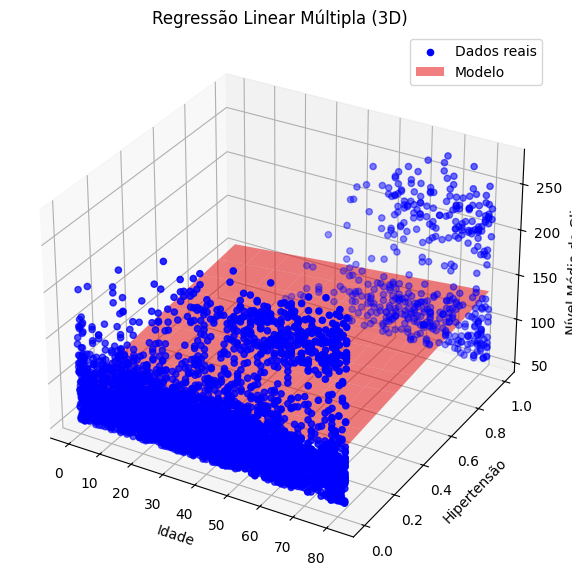

In [66]:
# Visualização em 3D (Usando idade e hipertensão como variáveis principais)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_limpeza["age"], df_limpeza["hypertension"], df_limpeza["avg_glucose_level"], color='blue', label='Dados reais')

# Criando uma superfície de previsão
def predict_surface(model, X, feature1, feature2, feature3):
    x = np.linspace(X[feature1].min(), X[feature1].max(), 10)
    y = np.linspace(X[feature2].min(), X[feature2].max(), 10)
    xx, yy = np.meshgrid(x, y)
    zz = model.predict(np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), X[feature3].mean())]).reshape(xx.shape)
    return xx, yy, zz

xx, yy, zz = predict_surface(model_multiple, df_limpeza, "age", "hypertension", "bmi")
ax.plot_surface(xx, yy, zz, color='red', alpha=0.5, label='Modelo')

ax.set_xlabel("Idade")
ax.set_ylabel("Hipertensão")
ax.set_zlabel("Nível Médio de Glicose")
plt.title("Regressão Linear Múltipla (3D)")
plt.legend()
plt.show()

## 6 - Conclusão